## Mathsolve - Photomath demo project

The goal of this project is to make a model which would be able to detect handwritten math symbols on a picture. After detecting math symbols the app should be able to solve simple mathematical problem given on a picture (addition, subtraction, multiplication and divison).

### Dataset preparation for model building

In [3]:
# import useful libraries
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import json

In [4]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
# path to the main dataset directory
dataset_main_path = r"C:\Users\Korisnik\git_workspace\MathSolve\model\dataset"

In [9]:
# dataset path object
dataset_path_object = pathlib.Path(dataset_main_path)

In [10]:
# dictionary with class names and all associated image paths
image_paths_dict = {}

# list of casses present in the dataset
dataset_classes = os.listdir(dataset_main_path)

for image_class in dataset_classes:
    image_paths_dict[image_class]=[image_path for image_path in dataset_path_object.glob('{}/*'.format(image_class))]

In [11]:
# check 
image_paths_dict

{'0': [WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/0CdBlhLw.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/10014.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/1058.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/10679.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/10825.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/10892.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/10941.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/10970.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/1199.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/12488.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/MathSolve/model/dataset/0/12580.jpg'),
  WindowsPath('C:/Users/Korisnik/git_workspace/M

Now that we have all image paths associated with classes, we need to assign labels to each class.

In [12]:
# class labels dictionary
class_labels_dict = dict()

i = 0

for image_class in dataset_classes:
    class_labels_dict[image_class] = i
    i+=1

In [13]:
# check
class_labels_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'add': 10,
 'dec': 11,
 'div': 12,
 'eq': 13,
 'mul': 14,
 'sub': 15,
 'x': 16,
 'y': 17,
 'z': 18}

Let's read first image of class 0 into numpy array with help of opencv.

In [9]:
img = cv.imread(str(image_paths_dict['0'][0]))

img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [10]:
# check shape
img.shape

(400, 400, 3)

We need to resize all images to some standard shape. Dataset contains some images 400x400 pixels, and some 155x155 pixels, but we need all images to be the same shape (model expects all samples to be the same dimension). We'll write function that will loop through all images and resize them to 155x155 pixels. 

In [11]:
def resize_images(dataset, labels, pixels_height, pixels_width):
    """This function resizes all images in the dataset to desired pixels height and pixels width.
    
    Args:
        dataset (dict): Dictionary with class names and all associated image paths.
        labels (dict): Dictionary with class names associated with corresponding labels 
        pixels_height (int): Desired height of the resized image in pixels.
        pixels_height (int): Desired width of the resized image in pixels.
    Returns:
        X (list): List of resized images.
        y (list): List of labels corresponding to list of.
    """
    X, y = [], []
    
    for class_name, images in dataset.items():
        for image in images:
                img = cv.imread(str(image))
                try:
                    resized_image = cv.resize(img, (pixels_height, pixels_width))
                    X.append(resized_image)
                    y.append(labels[class_name])
                except:
                    break
    return X, y

In [12]:
# create dataset prepared for train test split
X, y = resize_images(image_paths_dict, class_labels_dict, 150, 150)

In [13]:
len(X), len(y)

(10862, 10862)

In [14]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [15]:
# convert python list to numpy array
X = np.array(X)
y = np.array(y)

In [16]:
# make a default train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [17]:
# check 
len(X_train), len(X_test)

(8146, 2716)

In [18]:
# scaling of the array (dividing RGB channel with 255)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Building a model 

In [19]:
num_classes = 19

In [20]:
# build convolutional neural network
model = Sequential([
    layers.Conv2D(16, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(num_classes)
])

In [21]:
# compile the model 
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ["accuracy"])

In [22]:
# fit the model 
model.fit(X_train_scaled, y_train, epochs=15)

Epoch 1/15
255/255 [==============================] - 128s 386ms/step - loss: 1.5212 - accuracy: 0.5578
Epoch 2/15
255/255 [==============================] - 97s 380ms/step - loss: 0.4480 - accuracy: 0.8707
Epoch 3/15
255/255 [==============================] - 103s 402ms/step - loss: 0.1810 - accuracy: 0.9414
Epoch 4/15
255/255 [==============================] - 98s 384ms/step - loss: 0.0702 - accuracy: 0.9770
Epoch 5/15
255/255 [==============================] - 96s 376ms/step - loss: 0.0451 - accuracy: 0.9844
Epoch 6/15
255/255 [==============================] - 95s 371ms/step - loss: 0.0485 - accuracy: 0.9854
Epoch 7/15
255/255 [==============================] - 95s 371ms/step - loss: 0.0547 - accuracy: 0.9816
Epoch 8/15
255/255 [==============================] - 94s 370ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 9/15
255/255 [==============================] - 95s 371ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 10/15
255/255 [==============================] - 95s 373ms/step -

In [23]:
model.evaluate(X_test_scaled,y_test)

85/85 [==============================] - 30s 131ms/step - loss: 0.8534 - accuracy: 0.8579


[0.8534355163574219, 0.8578792214393616]

In [24]:
# Predictions for all the values in the test dataset
y_predicted = model.predict(X_test_scaled)

In [25]:
# list of predictions
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [26]:
# confusion matrix
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

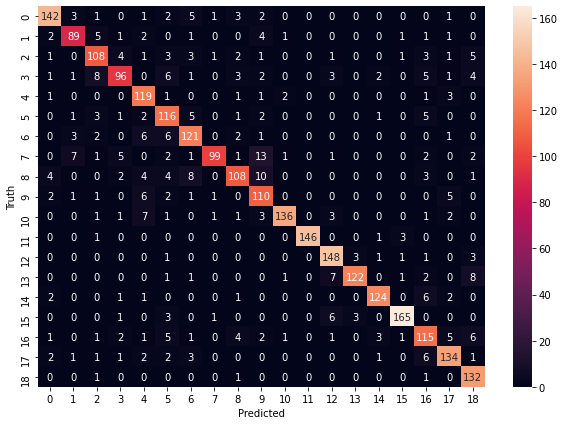

In [27]:
# confusion matrix plot with seaborn 
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Generally, predictions look good. Only problematic area is where model predicts 6, but the real value is 8. There are 15 such cases and we are going to look more into these.

In [28]:
# extract above mentioned images where true value is 8 but predicted value is 6
pos_indx = [] # indices where this is the case
for i in range(len(y_test)):
    if (y_test[i] == 8 and y_predicted_labels[i] == 6):
        pos_indx.append(i)

In [29]:
# check (expected output 8)
len(pos_indx)

8

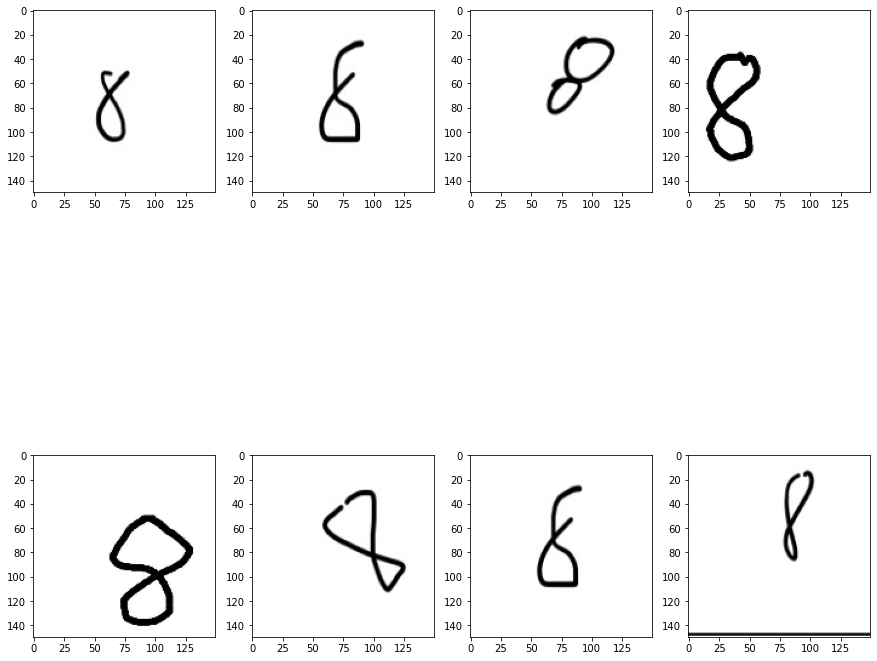

In [31]:
# inspect images
rows=2
cols = 4
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(pos_indx):
            axes[i, j].imshow(X_test[pos_indx[img_count]])
            img_count+=1

Most of them look fine but it is understandable that some of them are classified as 6, taking into account that some sixes in the dataset look like this:
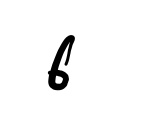

In [32]:
# save the model 
model.save('CNN.model')

INFO:tensorflow:Assets written to: CNN_test.model\assets


In [4]:
# load the model 
model_load = tf.keras.models.load_model('CNN.model')

In [5]:
# define a function to load array of images for prediction
def load_array(path):
    """This function saves numpy array to a .npy file.
    
    Args:
        path (str): path to a .npy file.
    Returns:
        loaded_array (ndarray): Loaded array of images.
    """
    loaded_array = np.load(path)
    
    return loaded_array

In [14]:
imgs_for_pred = load_array(r'C:\Users\Korisnik\git_workspace\MathSolve\Handwritten equation processing\output\output_array.npy')

In [15]:
prediction = model_load.predict(imgs_for_pred)

In [16]:
# list of predictions
predicted_labels = [np.argmax(i) for i in prediction]

# inspect
predicted_labels

[3, 10, 7]

The model predicted correct labels for all 3 images. This can be confirmed by looking at the class_labels_dict.

In [24]:
# check
class_labels_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'add': 10,
 'dec': 11,
 'div': 12,
 'eq': 13,
 'mul': 14,
 'sub': 15,
 'x': 16,
 'y': 17,
 'z': 18}

In [14]:
math_symbols = ['+', '.', '/', '=', '*', '-']

classes_to_replace = ['add', 'dec', 'div', 'eq', 'mul', 'sub']

In [15]:
# define a function that will replace 'add', 'dec', 'div', 'eq', 'mul' and 'sub' with symbols
def key_replace(my_dict, to_replace, replacements):
    for i in range(len(to_replace)):
        my_dict[replacements[i]] = my_dict.pop(to_replace[i])
    
    return my_dict

In [16]:
# retrieve keys from dictionary based on values
def get_classes(labels, my_dict):
    keys_list = []
    for label in labels:
        for key, value in my_dict.items():
             if label == value:
                    keys_list.append(key)

    return keys_list

In [17]:
class_labels_dict = key_replace(class_labels_dict, classes_to_replace, math_symbols)

In [18]:
class_labels_dict

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'x': 16,
 'y': 17,
 'z': 18,
 '+': 10,
 '.': 11,
 '/': 12,
 '=': 13,
 '*': 14,
 '-': 15}

In [20]:
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_labels_dict))

In [47]:
predicted_classes = get_key(predicted_labels, class_labels_dict)

#check
predicted_classes

['3', '+', '7']

### Testing

In [238]:
imgs_for_pred = load_array(r'C:\Users\Korisnik\git_workspace\MathSolve\Handwritten equation processing\output\output_array_07_03_2022_212646.npy')

In [233]:
imgs_for_pred.shape

(2, 150, 150, 3)

In [159]:
def preprocess_equation(digits_and_symbols):
    """This function does preprocessing of a list of single digits and mathematical symbols and returns a new list
    consisting of members of mathematical equation. For example, if input list is ['1', '2', '+', '2', '3'], output
    list would be ['12', '+', '23'].
    
    Args:
        digits_and_symbols (list): List of single digits and mathematical symbols.
    Returns:
        eq_members (list): List consisting of members of a mathematical equation which needs to be solved.
        
    """
    
    if len(digits_and_symbols) <= 3:
        return digits_and_symbols
    else:
        # join all elements of list into one string
        join = ''.join(digits_and_symbols)
        
        # separate previously joined string with separators according to regex [^.0-9] (matches all characters except 
        # decimal point and numbers)
        equation_as_list = re.split('([^.0-9])', join)
        
        return equation_as_list

In [197]:
# define a function that will take a list as an argument, interpret items of that list and make calculation

def solve_equation(equation_as_list):
    """This function makes mathematical operation with elements of a list.
    
    Args:
        equation_as_list (list): List consisting of members of a mathematical equation which needs to be solved.
        high (list): List of higher presedence operators indexes in equation_as_list.
        normal (list): List of normal presedence operators indexes in equation_as_list.
    Returns:
        result (float): Solution of mathematical equation which is represented by the list members.
    """
    result = None
    
    if len(equation_as_list) == 1:
        result = float(equation_as_list[0])
        
    if len(equation_as_list) == 2:
        result = float(equation_as_list[0])**float(equation_as_list[1])
    
    # check if equation has 3 members (in that case middle members always has to be operator) 
    # if this is true, simply do the operation
    if len(equation_as_list) == 3:
        # check if this equation is multiplication
        if equation_as_list[1] == '*':
            result = float(equation_as_list[0]) * float(equation_as_list[2])
        # check if this equation is division
        if equation_as_list[1] == '/':
            result = float(equation_as_list[0]) / float(equation_as_list[2])
        # check if this equation is addition
        if equation_as_list[1] == '+':
            result = float(equation_as_list[0]) + float(equation_as_list[2])
        # check if this equation is subtraction
        if equation_as_list[1] == '-':
            result = float(equation_as_list[0]) - float(equation_as_list[2])
    
    return result

In [220]:
def predict_and_calc_pipeline(images):
    """This function takes all necessary steps to get a solution of equation from the initial image (from making a model
    predictions of labels, to making a mathematical calculations to get a final solution).
    
    Args:
        images (ndarray): Array of images to make predictions on.
    Returns:
        solution (float): Final solution of mathematical equation from the image."""
    
    # make predictions
    predictions = model_load.predict(images)
    
    # get predicted labels from model predictions
    predicted_labels = [np.argmax(i) for i in predictions]
    
    # get classes from predicted labels
    digits_and_symbols = get_classes(predicted_labels, class_labels_dict)
    
    # preprocessing of a list of single digits and mathematical symbols
    equation_as_list = preprocess_equation(digits_and_symbols)
    
    # get solution of a mathematical equation from image
    solution = solve_equation(equation_as_list)
    
    return solution 

In [239]:
test_solution = predict_and_calc_pipeline(imgs_for_pred)

test_solution

1.0